<a href="https://colab.research.google.com/github/juyeon-shin/CLUB-D.N.A./blob/main/2022/01.%20%ED%8E%AD%EA%B7%84%20%EB%AA%B8%EB%AC%B4%EA%B2%8C%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/02_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 데이터 불러오기 
#### 데이터 설명
+ id : 샘플 아이디   
+ Species: 펭귄의 종을 나타내는 문자열   
+ Island : 샘플들이 수집된 Palmer Station 근처 섬 이름   
+ Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기    
+ Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이    
+ Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이    
+ Flipper Length (mm) : 펭귄의 팔(날개) 길이    
+ Sex : 펭귄의 성별    
+ Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율    
+ Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율    
+ Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)    


In [3]:
train = pd.read_csv('/content/drive/MyDrive/2022/202201 펭귄 몸무게 예측 경진대회/데이터/pret_train.csv')
train

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.305150,-25.190170,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.630740,-24.346840,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.519510,-27.018540,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.201060,-26.165240,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.383240,-26.842720,5700
...,...,...,...,...,...,...,...,...,...,...,...
106,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,8.738543,-25.718804,3700
107,110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.110060,-25.795490,4250
108,111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.970250,-26.036790,4100
109,112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.805890,-24.737350,2700


### EDA

In [ ]:
def EDA_obj (data):
  colors = ['#B9CDE5','#95B3D7','#356ED3','#123587','#051954']
  for i in data.columns:
    if data[i].dtypes == 'object':
      group_data = data.groupby([i],as_index=False).count()
      plt.bar(group_data[i], group_data['id'],color= colors)
      plt.title('%s bar plot'%i)
      plt.show()

      plt.pie(group_data['id']/100, labels=group_data[i], autopct='%.1f%%', colors = colors)
      plt.title('%s pie plot'%i)
      plt.show()

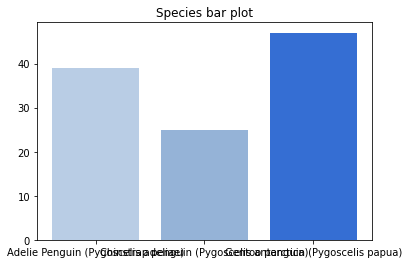

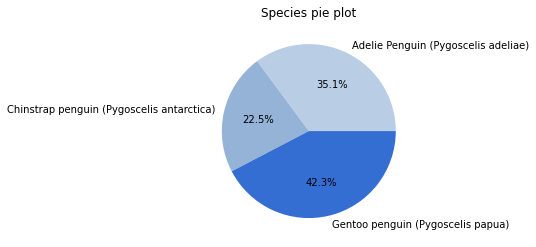

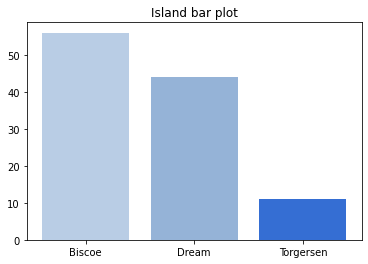

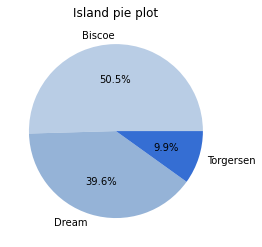

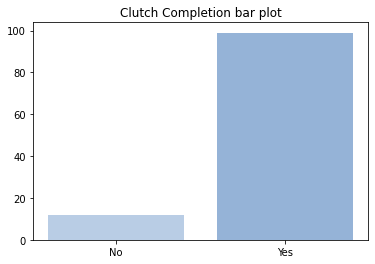

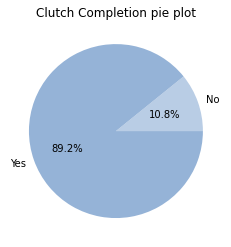

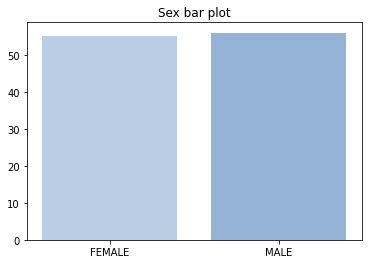

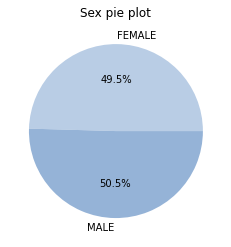

In [ ]:
EDA_obj(train)

+ Chinstrap penguin (Pygoscelis antarctica) 의 수가 가장 적다
+ Togrersen 의 수가 가장 적다
+ Clutch completion은 yes의 비율이 매우 높다
+ 성별은 반반이다

In [ ]:
def EDA_int (data):
  for i in data.columns:
    if data[i].dtypes != 'object':
      group_data = data.groupby([i],as_index=False).count()
      #막대 그래프
      plt.bar(group_data[i], group_data['id'])
      plt.title('%s bar plot'%i)
      plt.show()

      #산점도
      plt.scatter(group_data[i], group_data['id'])
      plt.title('%s scatter plot'%i)
      plt.show()

      #히스토그램
      plt.hist(group_data['id'],bins=10)
      plt.title('%s hist plot'%i)
      plt.show()

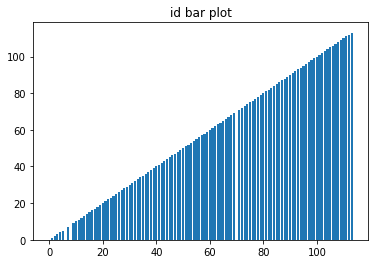

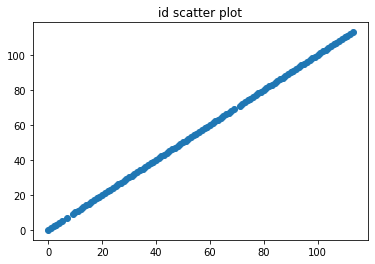

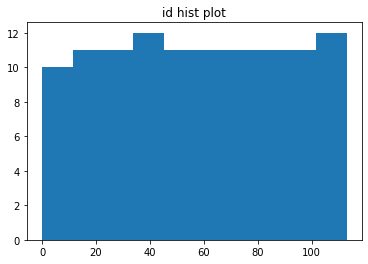

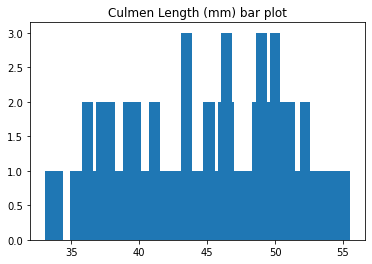

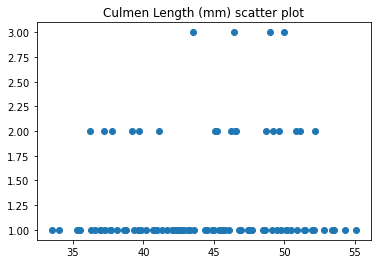

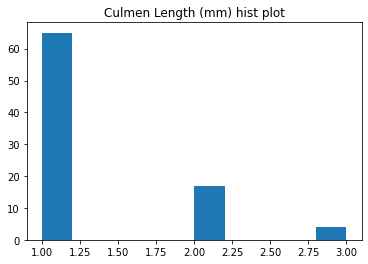

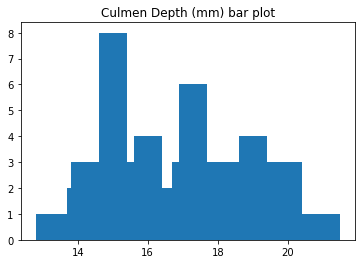

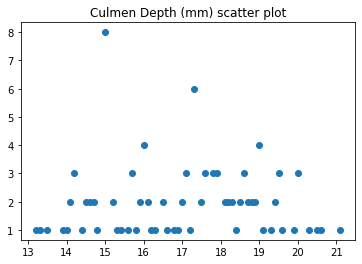

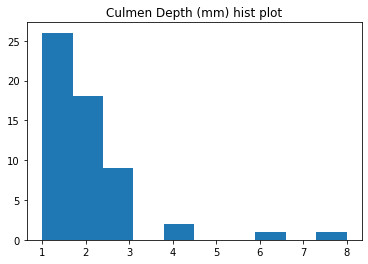

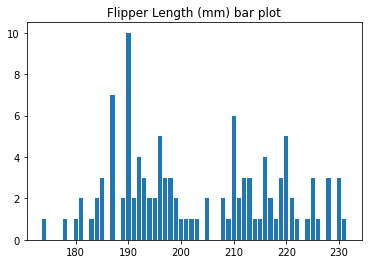

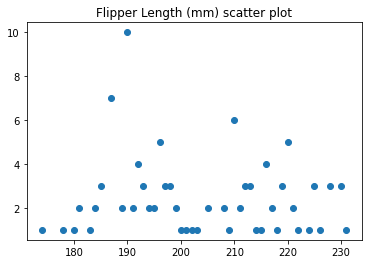

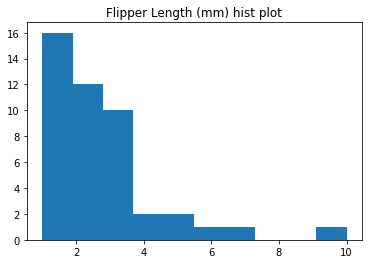

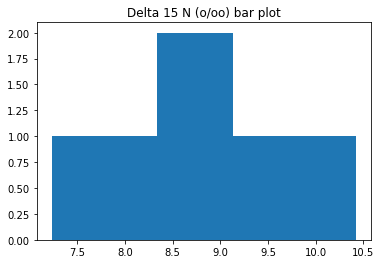

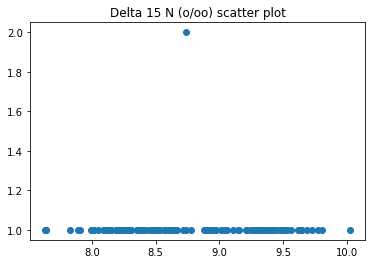

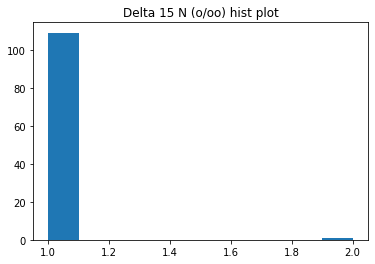

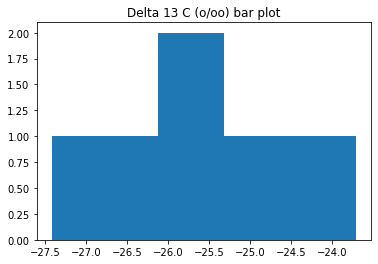

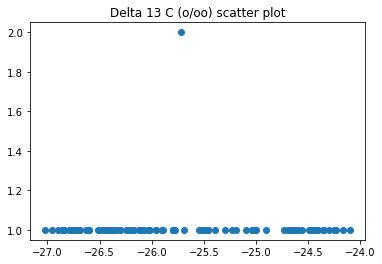

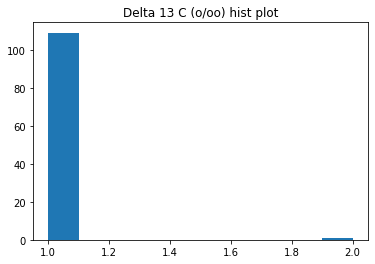

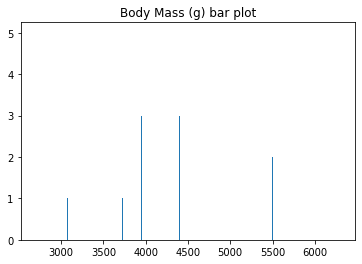

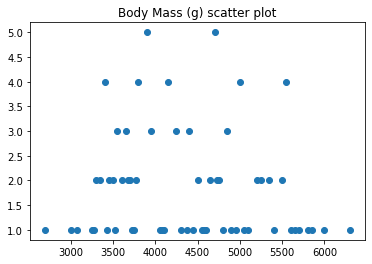

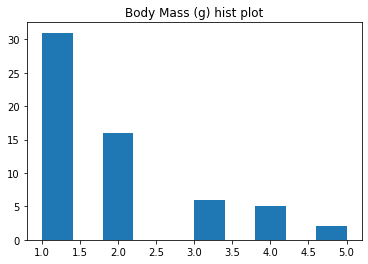

In [ ]:
EDA_int(train)

In [4]:
import seaborn as sns

In [5]:
train.corr()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
id,1.000000,0.046834,-0.115164,0.055703,-0.022396,0.039559,0.074026
Culmen Length (mm),0.046834,1.000000,-0.240330,0.672426,-0.034421,0.121183,0.565523
Culmen Depth (mm),-0.115164,-0.240330,1.000000,-0.595643,0.642486,0.462567,-0.492404
Flipper Length (mm),0.055703,0.672426,-0.595643,1.000000,-0.520025,-0.440326,0.866921
Delta 15 N (o/oo),-0.022396,-0.034421,0.642486,-0.520025,1.000000,0.636223,-0.546333
Delta 13 C (o/oo),0.039559,0.121183,0.462567,-0.440326,0.636223,1.000000,-0.466316
Body Mass (g),0.074026,0.565523,-0.492404,0.866921,-0.546333,-0.466316,1.000000


id                     0.074026
Culmen Length (mm)     0.565523
Culmen Depth (mm)     -0.492404
Flipper Length (mm)    0.866921
Delta 15 N (o/oo)     -0.546333
Delta 13 C (o/oo)     -0.466316
Body Mass (g)          1.000000
Name: Body Mass (g), dtype: float64


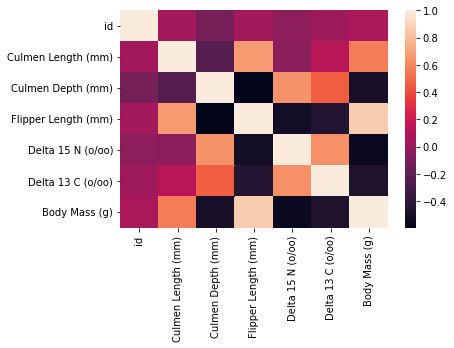

In [11]:
print(train.corr()['Body Mass (g)'])
sns.heatmap(train.corr())

몸무게와 가장 연관이 깊은 변수
+ Flipper length (+0.86)
+ Culmen length (+0.56)